# Analyze behavior of parties / members with preprocessed text for all protocols


**Aim of notebook:**

Create final figure **"fig_party_general_behaviour.pdf"** for project.

Steiglechner & Birk, 05.02.2022

In [1]:
# Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles

os.chdir('..')

from src.read_data_and_output import load_json, save_json
from src.definitions import PARTIES, BEHAVIOURS
from src.preprocess_text import *
from src.analyze_behaviour import *

In [2]:
# Load all preprocessed plenarprotokoll-texts from the 19th legislative period
pt_preprocessed_json = load_json('pt_preprocessed.json')

# Create behaviour dataframe & analyze on frequency of positive and negative behaviour for each party

In [3]:
i = 0
columns = ["Protocol ID","Party","Behaviour","Behaviour Weighted"]
df_behaviour_all_party_all_protocol = pd.DataFrame(columns=columns)
for key in pt_preprocessed_json.keys():
    # Get one temp protocol
    pt_temp = pt_preprocessed_json[key]
    # Create behaviour df temp
    df_behaviour_temp = create_df_behaviour(pt_temp,PARTIES,BEHAVIOURS)
    # df_temp = df_behaviour_temp[(df_behaviour_temp['Actor'] != 'all') & (df_behaviour_temp['Actor'] != 'abgeordneten')]
    # print(df_temp['Party'].unique())
    # Create one row for each party for one temp protocol
    df_behaviour_one_protocol = create_df_behaviour_one_protocol(df_behaviour_temp,PARTIES)
    # append one protocol to others
    df_behaviour_all_party_all_protocol = df_behaviour_all_party_all_protocol.append(df_behaviour_one_protocol)
    # if i == 5:
    #     break
    i += 1
    print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 

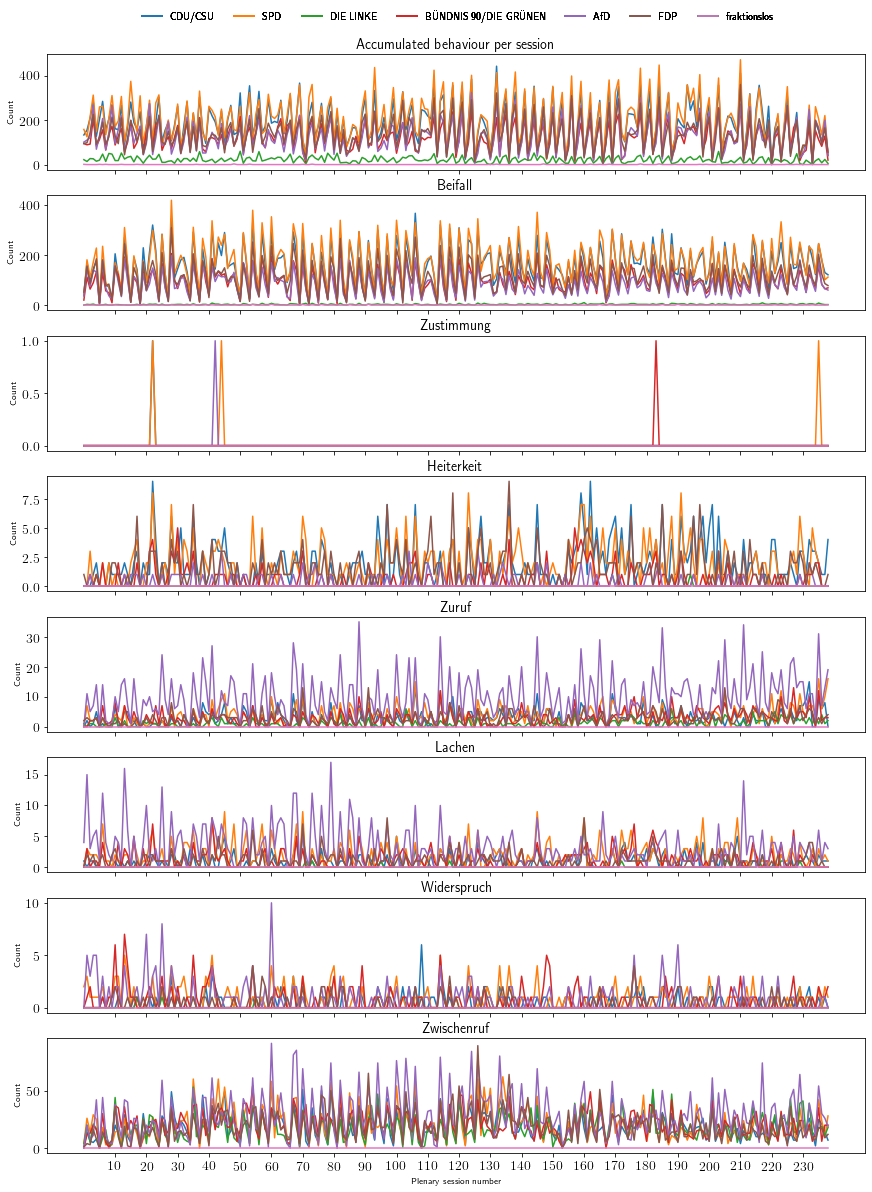

In [25]:
# Plot party behaviour over sessions
len_df = i
len_party = len(PARTIES)
x = range(len_df)

# Behaviours to iterate over
behaviour_list = ["Beifall","Zustimmung","Heiterkeit","Zuruf","Lachen","Widerspruch","Zwischenruf"]
# plots
# colors_parties = ['k','r','m','g','b','y']
with plt.rc_context(bundles.neurips2021()):
    fig, axs = plt.subplots(len_party+1,1,figsize=(12,16),sharex=True)
    for party in PARTIES:
        temp_sum_behaviour_party = []
        for behaviours in range(len(behaviour_list)):
            temp_behaviour_party = []
            for session in range(i):
                # Listed number of each behaviour for party along all plenary session
                temp_behaviour_party.append(df_behaviour_all_party_all_protocol[df_behaviour_all_party_all_protocol["Party"] == party]["Behaviour Weighted"].to_list()[session][behaviours])
                # summed behaviour for each plenary session
                if behaviours == len(behaviour_list)-1:
                    temp_sum_behaviour_party.append(sum(df_behaviour_all_party_all_protocol[df_behaviour_all_party_all_protocol["Party"] == party]["Behaviour Weighted"].to_list()[session]))

            temp_behaviour_party_plot = np.flip(np.array(temp_behaviour_party))
            axs[behaviours+1].plot(x,temp_behaviour_party_plot)
            axs[behaviours+1].set_title(f"{behaviour_list[behaviours]}",fontsize=14,fontweight='bold')
            axs[behaviours+1].tick_params(axis='y', labelsize=14)
            axs[behaviours+1].set_ylabel("Count")
        axs[0].plot(x,temp_sum_behaviour_party)
        axs[0].set_title("Accumulated behaviours per session",fontsize=14,fontweight='bold')
        fig.legend(PARTIES, ncol = 7,bbox_to_anchor=([0.9, 1.03, 0, 0]), frameon = False,fontsize=10)
        axs[0].tick_params(axis='y', labelsize=14)
        axs[7].set_xlabel("Plenary session number",fontsize=14)
        axs[0].set_ylabel("Count")
        plt.xticks(np.arange(10,len_df+1,10),fontsize=14,fontweight='bold')
plt.savefig("doc/fig_party_general_behaviour.pdf",bbox_inches='tight')